<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/ANN_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lung Cancer Analysis & Prediction

Lung cancer is a type of cancer that begins in the lungs. Lungs are two spongy organs in our chest that take in oxygen when we inhale and release carbon dioxide when we exhale. Lung cancer is the leading cause of cancer deaths worldwide.

People who smoke have the greatest risk of lung cancer, though lung cancer can also occur in people who have never smoked. The risk of lung cancer increases with the length of time and number of cigarettes someone's smoked. If someone quits smoking, even after smoking for many years, he/she can significantly reduce the chances of developing lung cancer.

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
#loading data
data = pd.read_csv("/content/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


#Data Info

In [6]:
data.ndim

2

In [7]:
data.shape

(309, 16)

In [8]:
data.size

4944

In [9]:
data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool

In [11]:
#handeling duplicate data
duplicate_counts = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_counts}")

Number of duplicate rows: 33


In [12]:
data = data.drop_duplicates()

In [13]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
279    False
280    False
281    False
282    False
283    False
Length: 276, dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [15]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There is no missing values in this dataset.

GENDER  Male = 1 Female = 0

LUNG_CANCER  Yes = 1 No = 0

#Insights

In [16]:
data_lungcancer= data["LUNG_CANCER"].value_counts()
data_lungcancer

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64

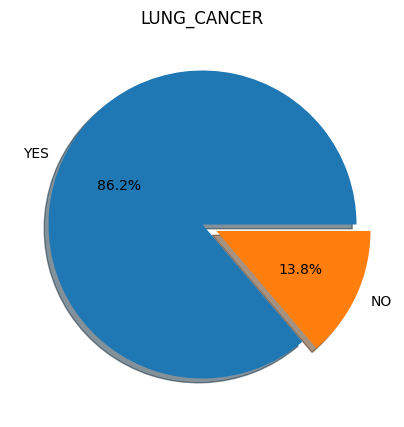

In [17]:
plt.figure(figsize=(5, 5))
data['LUNG_CANCER'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('LUNG_CANCER')
plt.ylabel('')
plt.show()

In [18]:
pd.crosstab(data.GENDER,data.LUNG_CANCER,margins=True).style.background_gradient(cmap='summer_r')

LUNG_CANCER,NO,YES,All
GENDER,,,
F,21,113,134
M,17,125,142
All,38,238,276


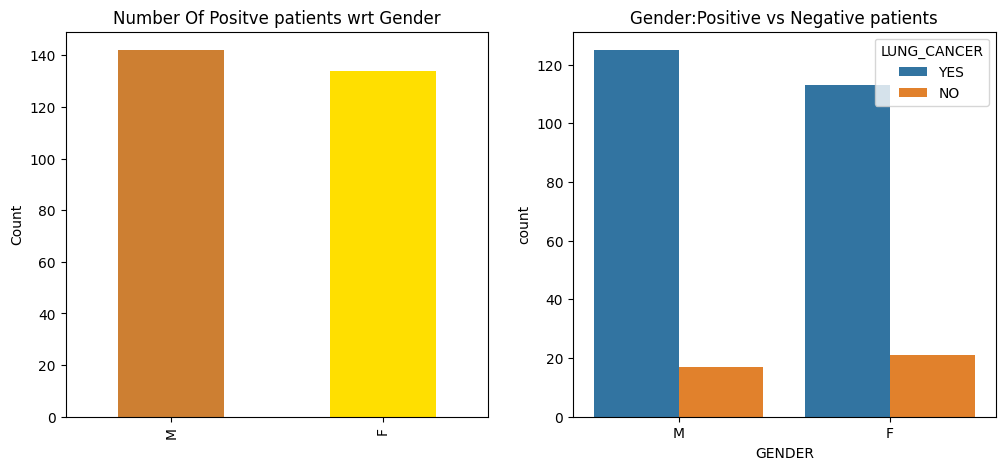

In [19]:
f,ax=plt.subplots(1,2,figsize=(12,5))
data['GENDER'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Positve patients wrt Gender')
ax[0].set_ylabel('Count')
sns.countplot(x='GENDER',hue='LUNG_CANCER',data=data,ax=ax[1])
ax[1].set_title('Gender:Positive vs Negative patients')
plt.show()

In [20]:
pd.crosstab([data.GENDER,data.SMOKING],data.LUNG_CANCER,margins=True).style.background_gradient(cmap='summer_r')


SMOKING
Yes = 2    No = 1


<ipython-input-21-8ba410a9cac2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


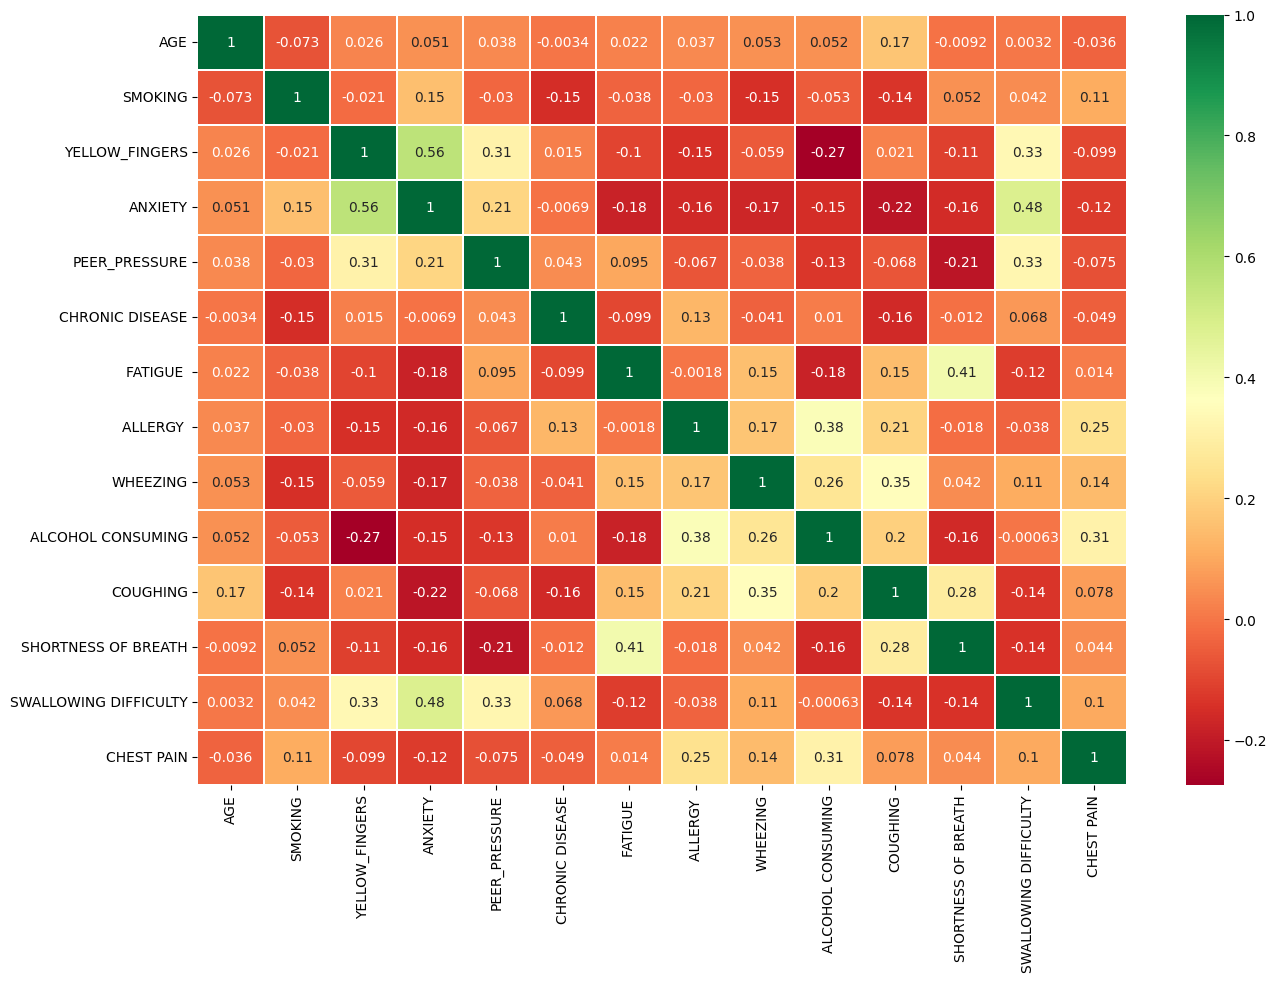

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

@ Out of 276 patients 86.2% of patients were turned out positive with lung cancer.

@ Positive cases for  both male and female patients are in almost equal preportion with few lesser number on female patients.

@ There is no severe connection between smoking and lung cancer in this group.But most of positive patients are also smokers.

@ From the above heatmap,we can see that the features are not much correlated. The highest correlation is between Anxiety and Yellow Finger i.e 0.56



#ANN Model

In [22]:
# First, we will change the data types of the categorical variables
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])

label_encoder2 = LabelEncoder()
data['LUNG_CANCER'] = label_encoder2.fit_transform(data['LUNG_CANCER'])

In [23]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


GENDER
Male = 1 Female = 0

LUNG_CANCER
Yes = 1 No = 0

Remaining columns Yes = 2 No = 1


In [31]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# split into input (X) and output (Y) variables
X = data.drop('LUNG_CANCER', axis=1)
Y = data['LUNG_CANCER']

In [32]:
# create model
model = Sequential()
model.add(Dense(30, input_dim=15,  activation='relu')) #1st layer
model.add(Dense(20,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3rd layer
model.add(Dense(5,  activation='relu')) #4th layer
model.add(Dense(1, activation='sigmoid')) #5th layer or op layer

In [33]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit the model
history = model.fit(X, Y, validation_split=0.3, epochs=110, batch_size=15)

Epoch 1/110
13/13 [==============================] - 1s 14ms/step - loss: 4.0262 - accuracy: 0.1295 - val_loss: 1.5142 - val_accuracy: 0.1566
Epoch 2/110
13/13 [==============================] - 0s 4ms/step - loss: 1.0439 - accuracy: 0.1295 - val_loss: 0.8410 - val_accuracy: 0.1566
Epoch 3/110
13/13 [==============================] - 0s 3ms/step - loss: 0.7399 - accuracy: 0.2850 - val_loss: 0.5504 - val_accuracy: 0.8434
Epoch 4/110
13/13 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.8705 - val_loss: 0.4389 - val_accuracy: 0.8434
Epoch 5/110
13/13 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8705 - val_loss: 0.4416 - val_accuracy: 0.8434
Epoch 6/110
13/13 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8705 - val_loss: 0.4471 - val_accuracy: 0.8434
Epoch 7/110
13/13 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8705 - val_loss: 0.4472 - val_accuracy: 0.8434
Epoch 8/110


In [35]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8623
accuracy: 86.23%


In [36]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

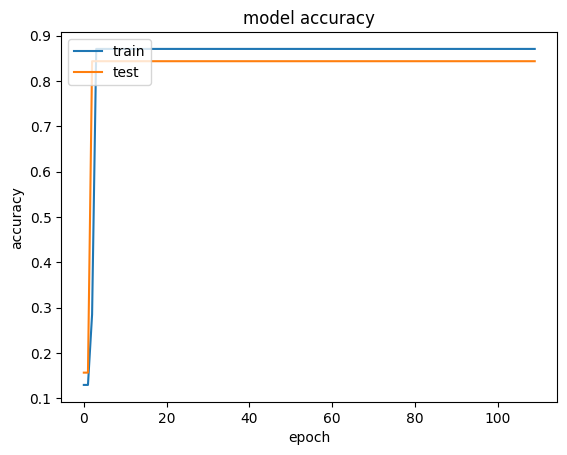

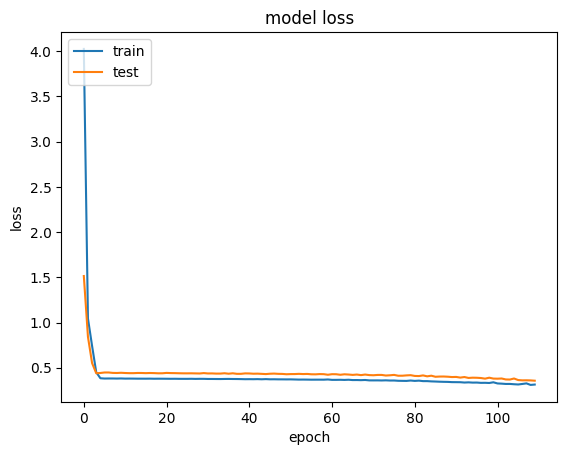

In [37]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()